In [1]:
# If you want use pandas-profiling in Colab
# ! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip 

In [2]:
# Loading main modules
import sys
import time
import os

# Loading common data related modules
import pandas as pd
import numpy as np
from math import sqrt
import tensorflow as tf
from tensorflow import keras

# Loading modeling algoritmes
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.linear_model import  Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn import linear_model

# Loading tools
from sklearn.model_selection import  train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import mean_absolute_error
from sklearn.utils import shuffle
from sklearn.model_selection import  GridSearchCV
import missingno as msno

# Loading visualisation modules
from pandas_profiling import ProfileReport
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

# Configure visualisations
%matplotlib inline

# Ignore warning messages
import warnings
warnings.filterwarnings('ignore')
from sklearn.utils._testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning

In [3]:
# Read data
df = pd.read_csv('https://raw.githubusercontent.com/MarekLas/snails_final/master/raw_data/snails.csv')

In [4]:
# Review and clean the data 
df.head(10)

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
5,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8
6,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20
7,F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,16
8,M,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,9
9,F,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.320,19


In [5]:
df.tail()

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10
4176,M,0.710,0.555,0.195,1.9485,0.9455,0.3765,0.4950,12


In [6]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             4177 non-null   object 
 1   length          4177 non-null   float64
 2   diameter        4177 non-null   float64
 3   height          4175 non-null   float64
 4   whole_weight    4177 non-null   float64
 5   shucked_weight  4177 non-null   float64
 6   viscera_weight  4177 non-null   float64
 7   shell_weight    4177 non-null   float64
 8   rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 497.8 KB


In [7]:
# Find null values
df.isnull().sum()

sex               0
length            0
diameter          0
height            2
whole_weight      0
shucked_weight    0
viscera_weight    0
shell_weight      0
rings             0
dtype: int64

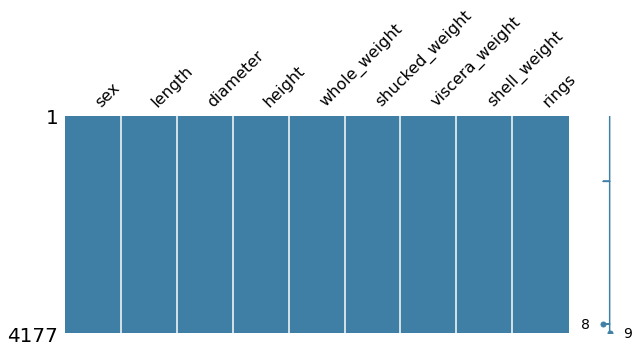

In [8]:
# Visualize null values
msno.matrix(df, figsize=(10,4),color=(0.25, 0.5, 0.65));

In [9]:
df[df.isnull().any(axis=1)]

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
1257,I,0.430,0.34,NaN,0.428,0.2065,0.0860,0.1150,8
3996,I,0.315,0.23,NaN,0.134,0.0575,0.0285,0.3505,6


In [10]:
df=df.dropna()

In [11]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4175 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             4175 non-null   object 
 1   length          4175 non-null   float64
 2   diameter        4175 non-null   float64
 3   height          4175 non-null   float64
 4   whole_weight    4175 non-null   float64
 5   shucked_weight  4175 non-null   float64
 6   viscera_weight  4175 non-null   float64
 7   shell_weight    4175 non-null   float64
 8   rings           4175 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 530.0 KB


In [12]:
# avgHeight = df["height"].mean()
# avgHeight
# df["height"].fillna(avgHeight,inplace=True)

In [13]:
df.describe()

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
count,4175.000000,4175.00000,4175.000000,4175.000000,4175.000000,4175.000000,4175.000000,4175.000000
mean,0.524065,0.40794,0.139583,0.829005,0.359476,0.180653,0.238834,9.935090
std,0.120069,0.09922,0.041725,0.490349,0.221954,0.109605,0.139212,3.224227
min,0.075000,0.05500,0.010000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.35000,0.115000,0.442250,0.186250,0.093500,0.130000,8.000000
50%,0.545000,0.42500,0.140000,0.800000,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.48000,0.165000,1.153500,0.502000,0.253000,0.328750,11.000000
max,0.815000,0.65000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [14]:
# # Pandas profiling raport
# profile = ProfileReport(df, title='Heart Disease', html={'style':{'full_width':True}})
# profile

In [15]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4175 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             4175 non-null   object 
 1   length          4175 non-null   float64
 2   diameter        4175 non-null   float64
 3   height          4175 non-null   float64
 4   whole_weight    4175 non-null   float64
 5   shucked_weight  4175 non-null   float64
 6   viscera_weight  4175 non-null   float64
 7   shell_weight    4175 non-null   float64
 8   rings           4175 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 530.0 KB


In [16]:
# Check categorical data and change them to numeric
df['sex'] = df['sex'].astype('category')

In [17]:
df['sex'].value_counts()

M    1528
I    1340
F    1307
Name: sex, dtype: int64

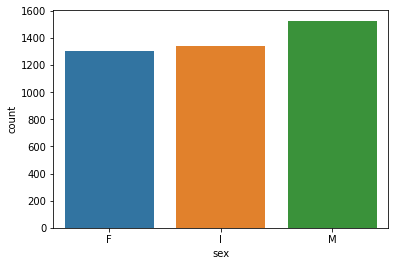

In [18]:
sns.countplot(x = 'sex', data = df);

In [19]:
df = pd.get_dummies(df)

In [20]:
df.head()

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings,sex_F,sex_I,sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0,1,0


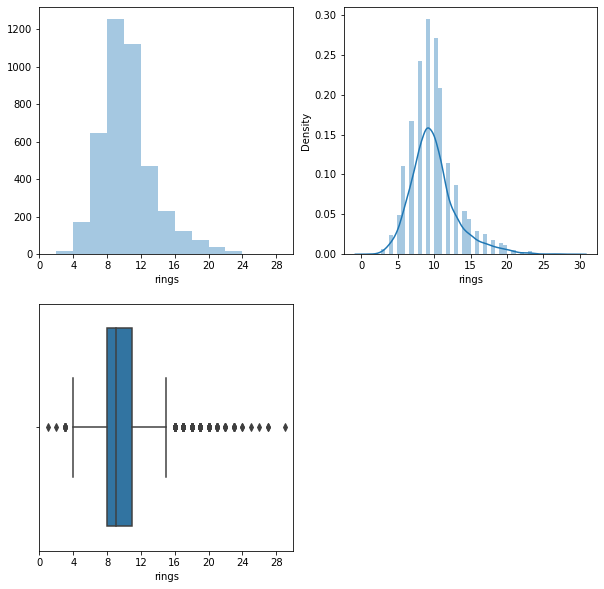

In [21]:
# Explore the rings column
rows = 2
cols = 2
i = 0

plt.figure(figsize=(cols * 5, rows * 5))

i += 1
plt.subplot(rows, cols, i)
plt.xticks(range(0, 31, 4))
plt.xlim(0, 30)
_ = sns.distplot(df['rings'], kde=False, bins=range(0, 31, 2))

i += 1
plt.subplot(rows, cols, i)
_ = sns.distplot(df['rings'])

i += 1
plt.subplot(rows, cols, i)
plt.xticks(range(0, 31, 4))
plt.xlim(0, 30)
_ = sns.boxplot(df['rings'])

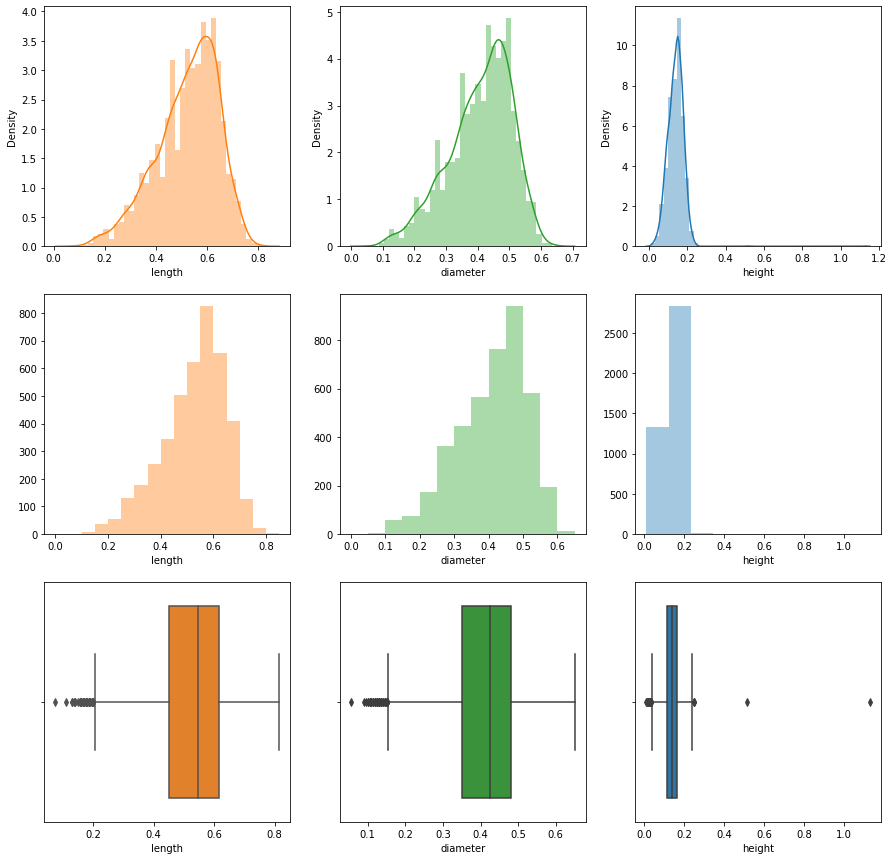

In [22]:
# Explore hight, lenght, diameter columns
plt.figure(figsize=(15, 15));

colors = sns.color_palette();

lines = 3
rows = 3
i = 0

i += 1
plt.subplot(lines, rows, i);
_ = sns.distplot(df['length'], color=colors[i % 3]);
    
i += 1
plt.subplot(lines, rows, i);
_ = sns.distplot(df['diameter'], color=colors[i % 3]);

i += 1
plt.subplot(lines, rows, i);
_ = sns.distplot(df['height'], color=colors[i % 3]);

i += 1
plt.subplot(lines, rows, i);
_ = sns.distplot(df['length'], kde=False, bins=np.arange(0.0, 0.9, 0.05), color=colors[i % 3]);
    
i += 1
plt.subplot(lines, rows, i);
_ = sns.distplot(df['diameter'], kde=False, bins=np.arange(0.0, 0.7, 0.05), color=colors[i % 3]);

i += 1
plt.subplot(lines, rows, i);
_ = sns.distplot(df['height'], kde=False, bins=10, color=colors[i % 3]);

i += 1
plt.subplot(lines, rows, i);
_ = sns.boxplot(df['length'], color=sns.color_palette()[i % 3]);

i += 1
plt.subplot(lines, rows, i);
_ = sns.boxplot(df['diameter'], color=colors[i % 3]);

i += 1
plt.subplot(lines, rows, i);
_ = sns.boxplot(df['height'], color=colors[i % 3]);

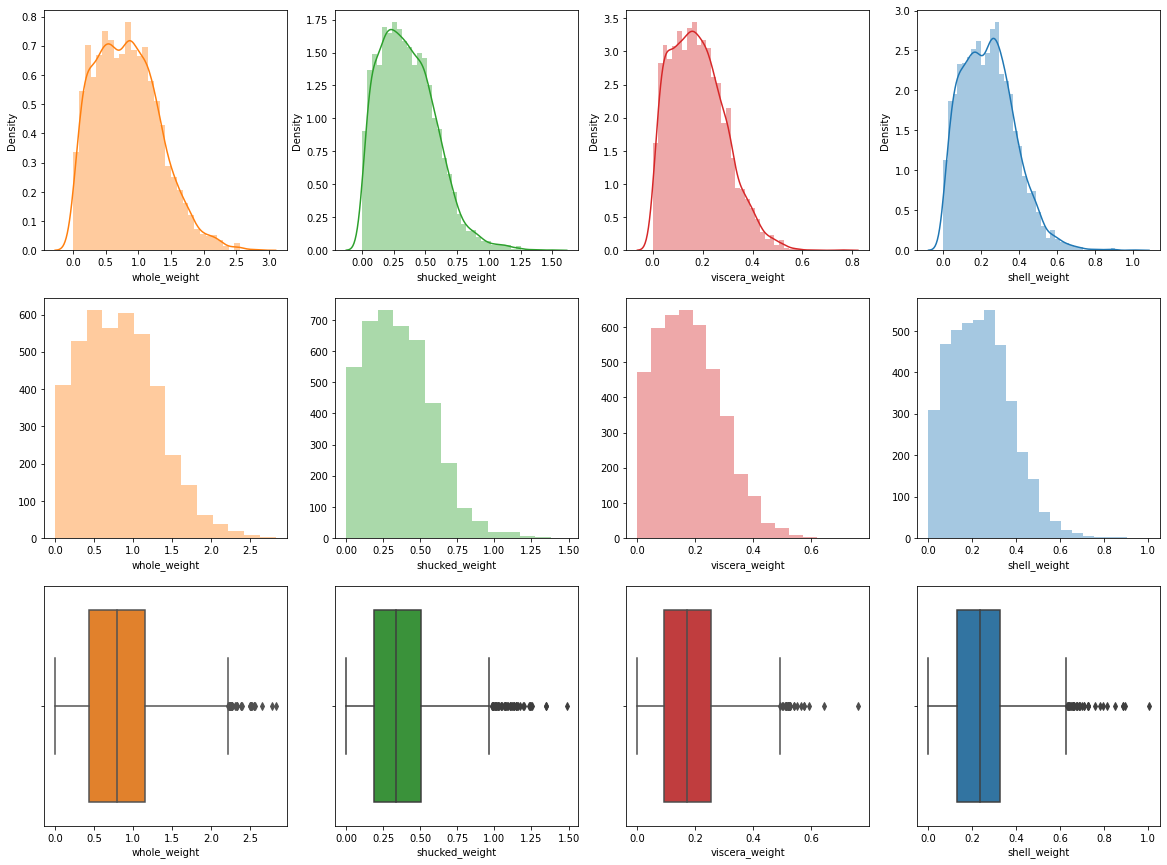

In [23]:
# Explore weight columns
plt.figure(figsize=(20, 15))

colors = sns.color_palette()

rows = 3
cols = 4
i = 0

i += 1
plt.subplot(rows, cols, i)
_ = sns.distplot(df['whole_weight'], color=colors[i % cols])
    
i += 1
plt.subplot(rows, cols, i)
_ = sns.distplot(df['shucked_weight'], color=colors[i % cols])

i += 1
plt.subplot(rows, cols, i)
_ = sns.distplot(df['viscera_weight'], color=colors[i % cols])

i += 1
plt.subplot(rows, cols, i)
_ = sns.distplot(df['shell_weight'], color=colors[i % cols])

i += 1
plt.subplot(rows, cols, i)
_ = sns.distplot(df['whole_weight'], kde=False, bins=14, color=colors[i % cols])
    
i += 1
plt.subplot(rows, cols, i)
_ = sns.distplot(df['shucked_weight'], kde=False, bins=14, color=colors[i % cols])

i += 1
plt.subplot(rows, cols, i)
_ = sns.distplot(df['viscera_weight'], kde=False, bins=16, color=colors[i % cols])

i += 1
plt.subplot(rows, cols, i)
_ = sns.distplot(df['shell_weight'], kde=False, bins=20, color=colors[i % cols])

i += 1
plt.subplot(rows, cols, i)
_ = sns.boxplot(df['whole_weight'], color=colors[i % cols])

i += 1
plt.subplot(rows, cols, i)
_ = sns.boxplot(df['shucked_weight'], color=colors[i % cols])

i += 1
plt.subplot(rows, cols, i)
_ = sns.boxplot(df['viscera_weight'], color=colors[i % cols])

i += 1
plt.subplot(rows, cols, i)
_ = sns.boxplot(df['shell_weight'], color=colors[i % cols])

In [24]:
# # Create the age column - w zwiazku z tym ze wplywa to negatywnie na wynik - zrezygnowałem
# df['age'] = df['rings']+1.5
# df.drop('rings', axis = 1, inplace = True)

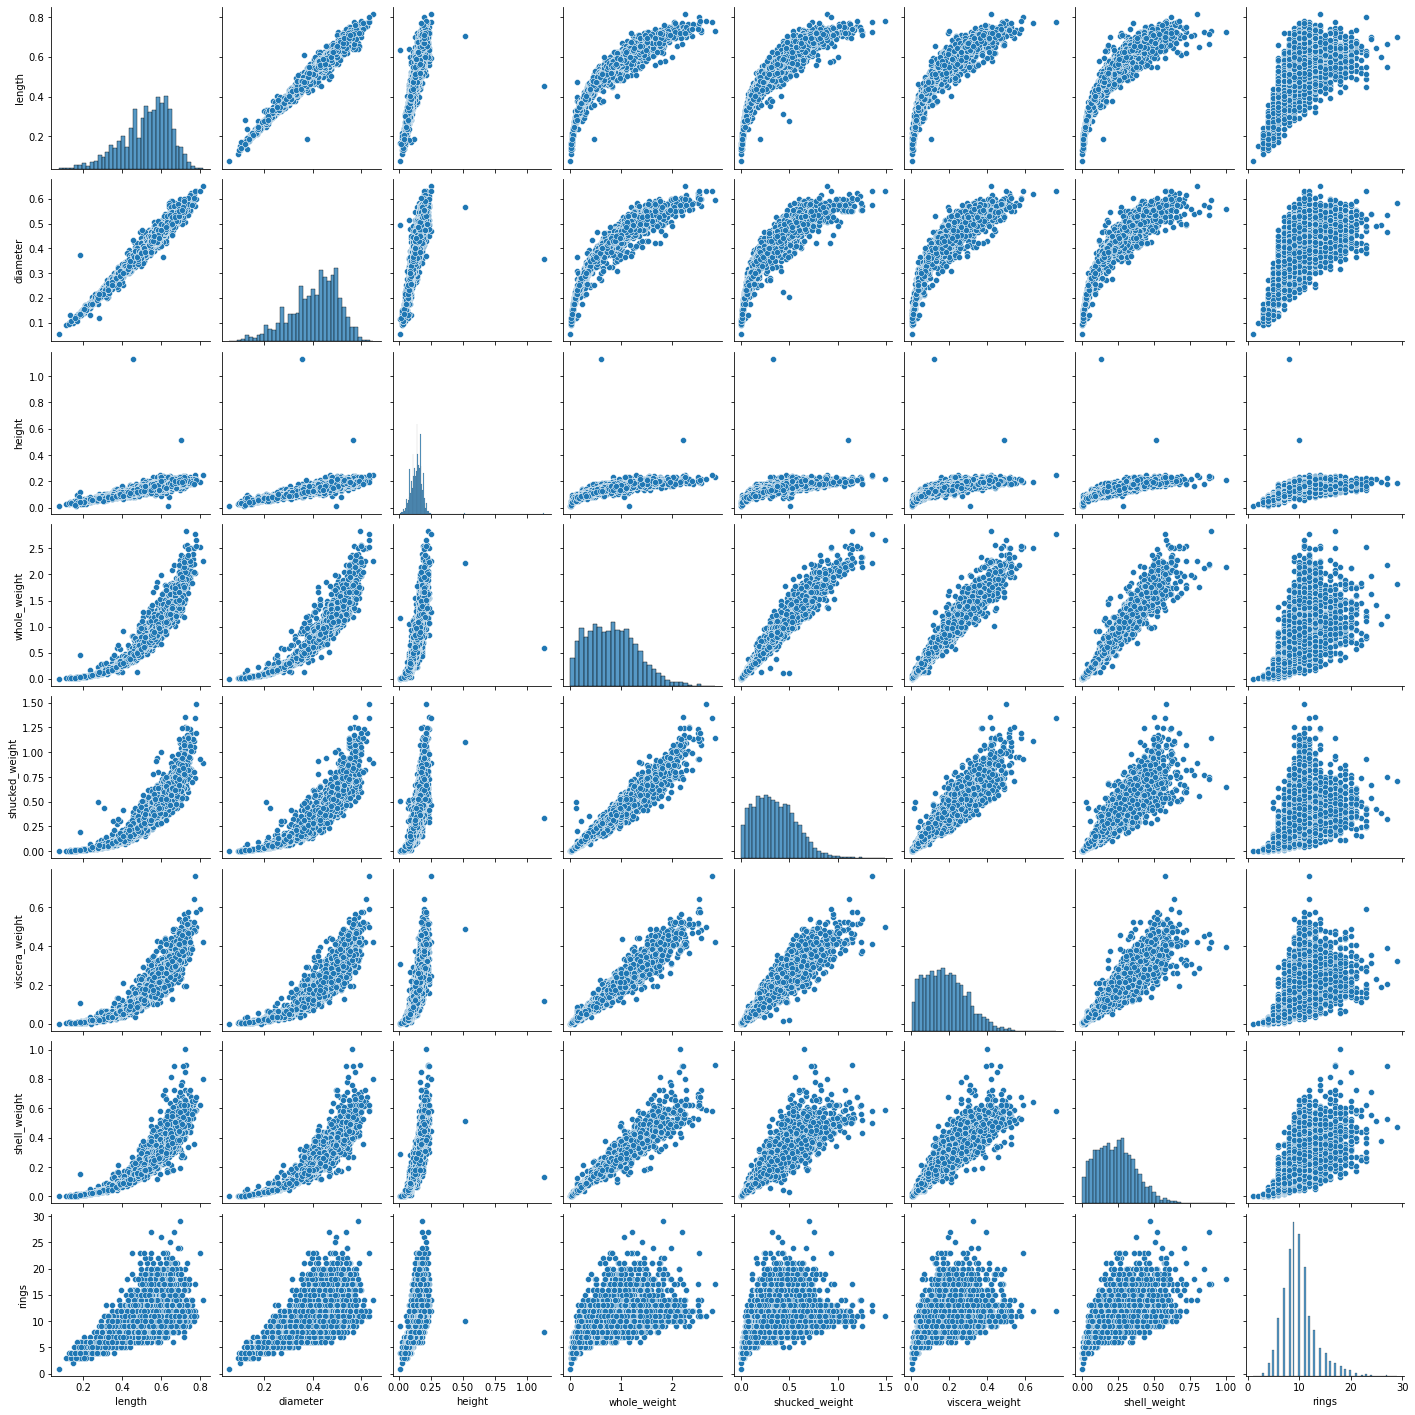

In [25]:
# Check for the dependencies in the data
_=sns.pairplot(df[['length','diameter','height','whole_weight','shucked_weight','viscera_weight','shell_weight','rings']])

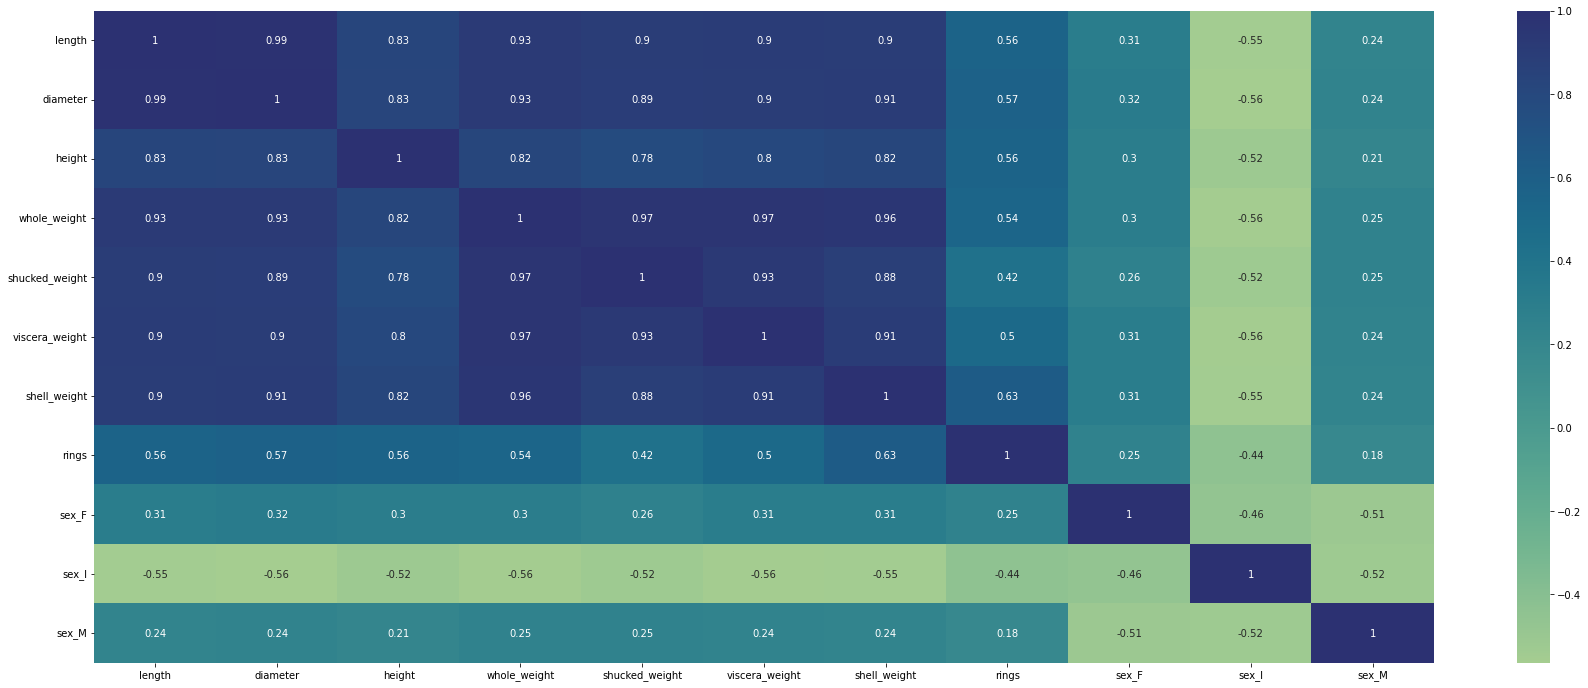

In [26]:
# Check correlations
plt.figure(figsize=(30,12))
_=sns.heatmap(df.corr(), annot=True, cmap="crest")

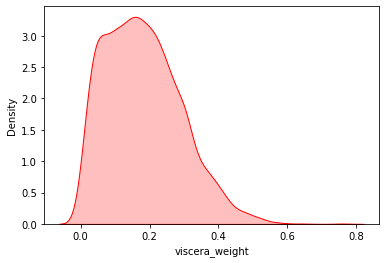

In [27]:
sns.kdeplot(df['viscera_weight'], shade=True, color='r');

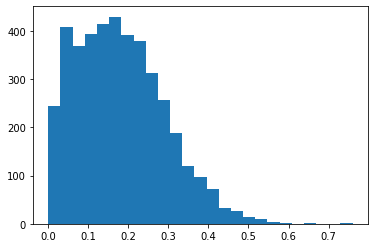

In [28]:
plt.hist(df['viscera_weight'], bins=25);

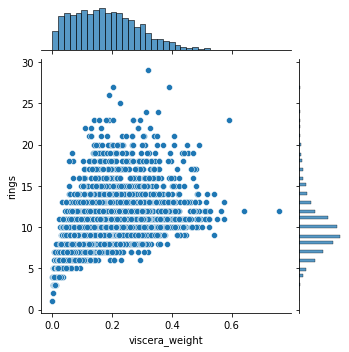

In [29]:
sns.jointplot(x='viscera_weight', y='rings', data=df, size=5);

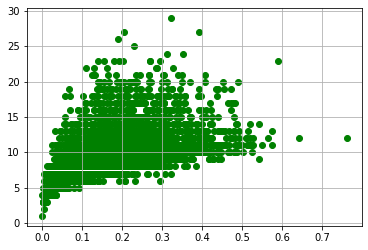

In [30]:
var = 'viscera_weight'
plt.scatter(x = df[var], y = df['rings'],c='green')
plt.grid(True)

In [31]:
df.drop(df[(df['viscera_weight']> 0.6) & (df['rings'] < 25)].index, inplace=True)
df.drop(df[(df['viscera_weight']<0.6) & (df['rings'] > 28)].index, inplace=True)

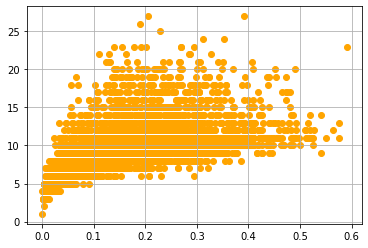

In [32]:
var = 'viscera_weight'
plt.scatter(x = df[var], y = df['rings'],c='orange')
plt.grid(True)

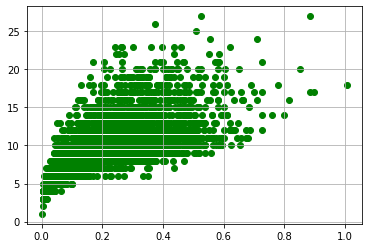

In [33]:
var = 'shell_weight'
plt.scatter(x = df[var], y = df['rings'],c='green')
plt.grid(True)

In [34]:
df.drop(df[(df['shell_weight']> 0.9) & (df['rings'] < 25)].index, inplace=True)
df.drop(df[(df['shell_weight']<0.8) & (df['rings'] > 25)].index, inplace=True)

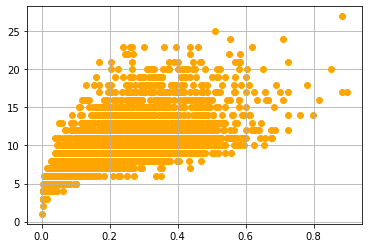

In [35]:
var = 'shell_weight'
plt.scatter(x = df[var], y = df['rings'],c='orange')
plt.grid(True)

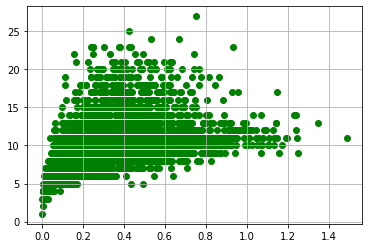

In [36]:
var = 'shucked_weight'
plt.scatter(x = df[var], y = df['rings'],c='green')
plt.grid(True)

In [37]:
df.drop(df[(df['shucked_weight']>= 1.4) & (df['rings'] < 20)].index, inplace=True)
df.drop(df[(df['shucked_weight']<1) & (df['rings'] > 25)].index, inplace=True)

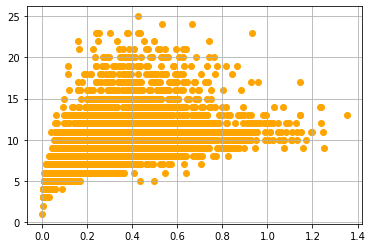

In [38]:
var = 'shucked_weight'
plt.scatter(x = df[var], y = df['rings'],c='orange')
plt.grid(True)

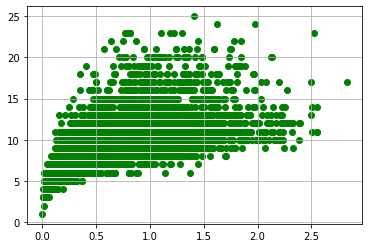

In [39]:
var = 'whole_weight'
plt.scatter(x = df[var], y = df['rings'],c='green')
plt.grid(True)

In [40]:
df.drop(df[(df['whole_weight']>= 2.3) & (df['rings'] < 25)].index, inplace=True)
df.drop(df[(df['whole_weight']<2.5) & (df['rings'] > 25)].index, inplace=True)

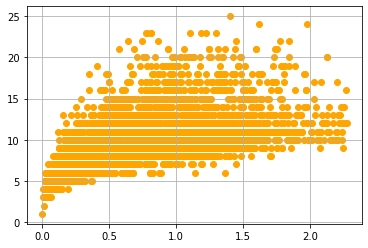

In [41]:
var = 'whole_weight'
plt.scatter(x = df[var], y = df['rings'],c='orange')
plt.grid(True)

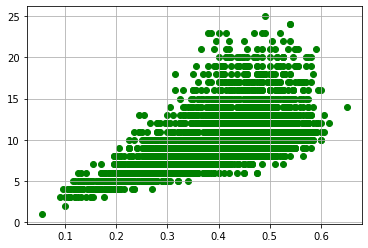

In [42]:
var = 'diameter'
plt.scatter(x = df[var], y = df['rings'],c='green')
plt.grid(True)

In [43]:
df.drop(df[(df['diameter']<0.6) & (df['rings'] > 25)].index, inplace=True)
df.drop(df[(df['diameter']>=0.7) & (df['rings']< 25)].index, inplace=True)

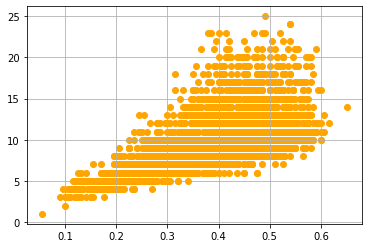

In [44]:
var = 'diameter'
plt.scatter(x = df[var], y = df['rings'],c='orange')
plt.grid(True)

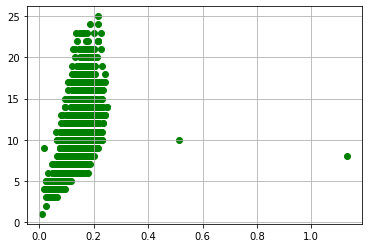

In [45]:
var = 'height'
plt.scatter(x = df[var], y = df['rings'],c='green')
plt.grid(True)

In [46]:
df.drop(df[(df['height']>0.4) & (df['rings'] < 15)].index, inplace=True)
df.drop(df[(df['height']<0.4) & (df['rings'] > 30)].index, inplace=True)

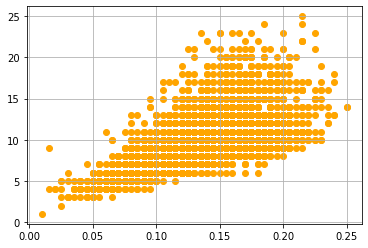

In [47]:
var = 'height'
plt.scatter(x = df[var], y = df['rings'],c='orange')
plt.grid(True)

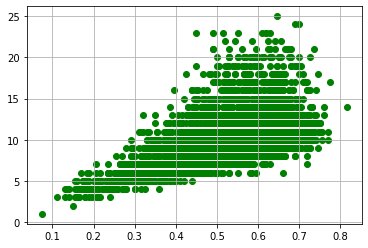

In [48]:
var = 'length'
plt.scatter(x = df[var], y = df['rings'],c='green')
plt.grid(True)

In [49]:
df.drop(df[(df['length']<0.8) & (df['rings'] > 25)].index, inplace=True)
df.drop(df[(df['length']>=0.8) & (df['rings']< 25)].index, inplace=True)

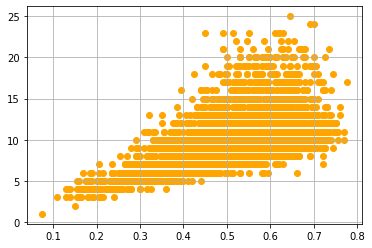

In [50]:
var = 'length'
plt.scatter(x = df[var], y = df['rings'],c='orange')
plt.grid(True)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4148 entries, 0 to 4176
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   length          4148 non-null   float64
 1   diameter        4148 non-null   float64
 2   height          4148 non-null   float64
 3   whole_weight    4148 non-null   float64
 4   shucked_weight  4148 non-null   float64
 5   viscera_weight  4148 non-null   float64
 6   shell_weight    4148 non-null   float64
 7   rings           4148 non-null   int64  
 8   sex_F           4148 non-null   uint8  
 9   sex_I           4148 non-null   uint8  
 10  sex_M           4148 non-null   uint8  
dtypes: float64(7), int64(1), uint8(3)
memory usage: 303.8 KB


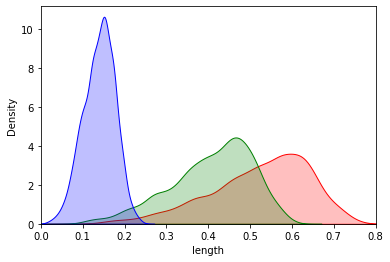

In [52]:
sns.kdeplot(df['length'], shade=True, color='r');
sns.kdeplot(df['diameter'], shade=True, color='g');
sns.kdeplot(df['height'], shade=True, color='b');
plt.xlim(0,0.8);

In [53]:
# df['volume'] = df['length']*df['diameter']*df['height']

In [54]:
# plt.figure(figsize=(5,5));
# plt.hist(x=df['volume'], bins=30, color='g');
# plt.xlabel('Volume in mm^3');
# plt.ylabel('Frequency');
# plt.title('Distribution of volume');

In [55]:
# plt.hist(df['length'], bins=30);

In [56]:
# plt.hist(df['diameter'], bins=30);

In [57]:
# plt.hist(df['height'], bins=30);

In [58]:
# df.drop(['length','diameter','height'], axis=1, inplace=True)

In [59]:
df.columns

Index(['length', 'diameter', 'height', 'whole_weight', 'shucked_weight',
       'viscera_weight', 'shell_weight', 'rings', 'sex_F', 'sex_I', 'sex_M'],
      dtype='object')

In [60]:
# Splitting data into features X, and labels y
X = df.drop(['rings'], axis=1)
y = df['rings']

In [61]:
# View X
X.head()

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,sex_F,sex_I,sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,0,1,0


In [62]:
# View y
y.head()

0    15
1     7
2     9
3    10
4     7
Name: rings, dtype: int64

In [63]:
# Splitting data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [64]:
# Scaling values
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_train

array([[-0.06962978, -0.12227709, -0.3633377 , ..., -0.67520494,
         1.45648709, -0.76058969],
       [ 1.19606566,  1.15323654,  0.95162139, ..., -0.67520494,
        -0.6865835 ,  1.31476934],
       [-0.53371811, -0.58146199, -0.75782543, ..., -0.67520494,
         1.45648709, -0.76058969],
       ...,
       [-0.49152826, -0.020236  , -0.10034588, ..., -0.67520494,
        -0.6865835 ,  1.31476934],
       [ 1.53358445,  1.5614009 ,  0.82012548, ...,  1.48103182,
        -0.6865835 , -0.76058969],
       [ 0.68978749,  0.69405163,  0.95162139, ...,  1.48103182,
        -0.6865835 , -0.76058969]])

In [65]:
scores = []
mae_error = []
models = ['Linear Regression', 'Lasso Regression', 'AdaBoost Regression', 'Ridge Regression', 'RandomForest Regression', 'KNeighbours Regression', 'GradientBoosting Regression', 'SVR', 'ElasticNet', 'DecisionTree Regression']

In [66]:
# Linear Regression
lr =LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test,y_pred)
mae_error.append(mae)
scores.append(r2)
print("Linear Regression R2: {0:.2f}".format(r2))

Linear Regression R2: 0.57


In [67]:
'''
# Best parameters for Lasso Regression
param  = {'alpha' : [0.5, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0],
         'fit_intercept' : ['True', 'False'],
         'max_iter' : [1000, 2000, 3000]}
glasso = GridSearchCV(estimator = Lasso(random_state=42,),
param_grid = param,scoring= 'neg_mean_squared_error' ,cv = 5,  n_jobs = -1)
glasso.fit(X_train, y_train)
glasso.best_params_, glasso.best_score_
'''

"\n# Best parameters for Lasso Regression\nparam  = {'alpha' : [0.5, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0],\n         'fit_intercept' : ['True', 'False'],\n         'max_iter' : [1000, 2000, 3000]}\nglasso = GridSearchCV(estimator = Lasso(random_state=42,),\nparam_grid = param,scoring= 'neg_mean_squared_error' ,cv = 5,  n_jobs = -1)\nglasso.fit(X_train, y_train)\nglasso.best_params_, glasso.best_score_\n"

In [68]:
# Lasso
lasso = Lasso(alpha=0.5, fit_intercept=True,random_state=42)
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test,y_pred)
mae_error.append(mae)
scores.append(r2)
print('Lasso Regression R2: {0:.2f}'.format(r2))

Lasso Regression R2: 0.38


In [69]:
'''
# Best parameters for AdaBoost Regressor
param = {'n_estimators':[10,50,250,1000,2000],
         'learning_rate':[0.01,0.1,0.2,0.5]}
glasso = GridSearchCV(estimator = AdaBoostRegressor(random_state=42,),
param_grid = param,scoring= 'neg_mean_squared_error' ,cv = 5,  n_jobs = -1)
glasso.fit(X_train, y_train)
glasso.best_params_, glasso.best_score_
'''

"\n# Best parameters for AdaBoost Regressor\nparam = {'n_estimators':[10,50,250,1000,2000],\n         'learning_rate':[0.01,0.1,0.2,0.5]}\nglasso = GridSearchCV(estimator = AdaBoostRegressor(random_state=42,),\nparam_grid = param,scoring= 'neg_mean_squared_error' ,cv = 5,  n_jobs = -1)\nglasso.fit(X_train, y_train)\nglasso.best_params_, glasso.best_score_\n"

In [70]:
# AdaBoost Regressor
abc = AdaBoostRegressor(n_estimators=250, learning_rate=0.01, random_state=42)
abc.fit(X_train, y_train)
y_pred = abc.predict(X_test)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test,y_pred)
mae_error.append(mae)
scores.append(r2)
print('AdaBoost Regression R2: {0:.2f}'.format(r2))

AdaBoost Regression R2: 0.48


In [71]:
'''
# Best parameters for Ridge
param  = {'alpha':[0.01, 0.1, 1,10,100],
         'solver' : ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}
gridge = GridSearchCV(estimator = Ridge(random_state=42,),
param_grid = param,scoring= 'r2' ,cv = 5,  n_jobs = -1)
gridge.fit(X_train, y_train)
gridge.best_params_, gridge.best_score_
'''

"\n# Best parameters for Ridge\nparam  = {'alpha':[0.01, 0.1, 1,10,100],\n         'solver' : ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}\ngridge = GridSearchCV(estimator = Ridge(random_state=42,),\nparam_grid = param,scoring= 'r2' ,cv = 5,  n_jobs = -1)\ngridge.fit(X_train, y_train)\ngridge.best_params_, gridge.best_score_\n"

In [72]:
# Ridge
ridge = Ridge(alpha=1, solver='sparse_cg', random_state=42)
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test,y_pred)
mae_error.append(mae)
scores.append(r2)
print('Ridge Regression R2: {0:.2f}'.format(r2))

Ridge Regression R2: 0.57


In [73]:
'''
# Best parameters for Random forest
param  = {'n_estimators' : [10 ,20, 30, 40, 50, 60, 70, 80, 90, 100],
         'max_features' : ['auto', 'sqrt', 'log2'],
         'max_depth' : [3, 5, 8, 10, 15, 20, 30],
         'criterion' : ["squared_error", "absolute_error", "poisson"]}
grf = GridSearchCV(estimator = RandomForestRegressor(random_state=42,),
param_grid = param,scoring= 'r2' ,cv = 5,  n_jobs = -1)
grf.fit(X_train, y_train)
grf.best_params_, grf.best_score_
'''

'\n# Best parameters for Random forest\nparam  = {\'n_estimators\' : [10 ,20, 30, 40, 50, 60, 70, 80, 90, 100],\n         \'max_features\' : [\'auto\', \'sqrt\', \'log2\'],\n         \'max_depth\' : [3, 5, 8, 10, 15, 20, 30],\n         \'criterion\' : ["squared_error", "absolute_error", "poisson"]}\ngrf = GridSearchCV(estimator = RandomForestRegressor(random_state=42,),\nparam_grid = param,scoring= \'r2\' ,cv = 5,  n_jobs = -1)\ngrf.fit(X_train, y_train)\ngrf.best_params_, grf.best_score_\n'

In [74]:
# Random forest
randomforest = RandomForestRegressor(criterion='squared_error', max_depth=10, max_features='log2', n_estimators=100)
randomforest.fit(X_train, y_train)
y_pred = randomforest.predict(X_test)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test,y_pred)
mae_error.append(mae)
scores.append(r2)
print('Random Forest R2: {0:.2f}'.format(r2))

Random Forest R2: 0.56


In [75]:
'''
# Best parameters for KNeighbours
param = {'n_neighbors':[3, 5, 10, 15, 20],
         'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
          'weights' : ['uniform', 'distance'],
         'leaf_size' : [10, 20, 30, 40, 50]}
gkn = GridSearchCV(estimator = KNeighborsRegressor(),
param_grid = param,scoring= 'neg_mean_squared_error' ,cv = 5,  n_jobs = -1)
gkn.fit(X_train, y_train)
gkn.best_params_, gkn.best_score_
'''

"\n# Best parameters for KNeighbours\nparam = {'n_neighbors':[3, 5, 10, 15, 20],\n         'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],\n          'weights' : ['uniform', 'distance'],\n         'leaf_size' : [10, 20, 30, 40, 50]}\ngkn = GridSearchCV(estimator = KNeighborsRegressor(),\nparam_grid = param,scoring= 'neg_mean_squared_error' ,cv = 5,  n_jobs = -1)\ngkn.fit(X_train, y_train)\ngkn.best_params_, gkn.best_score_\n"

In [76]:
# K-Neighbours
kneighbours = KNeighborsRegressor(algorithm='auto',leaf_size=10,n_neighbors=20,weights='distance')
kneighbours.fit(X_train, y_train)
y_pred = kneighbours.predict(X_test)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test,y_pred)
mae_error.append(mae)
scores.append(r2)
print('K-Neighbours Regression R2: {0:.2f}'.format(r2))

K-Neighbours Regression R2: 0.53


In [77]:
'''
# Best parameters for GradienBoost - za mała moc obliczeniowa. Wybrane ręcznie
# param  = {'loss' : ['squared_error', 'absolute_error', 'huber', 'quantile'],
#          'max_features' : ['auto', 'sqrt', 'log2'],
#          'max_depth' : [3, 5, 8, 10, 15, 20, 30],
#          'criterion' : ['friedman_mse', 'squared_error', 'mse', 'mae']}
# ggb = GridSearchCV(estimator = GradientBoostingRegressor(random_state=42,),
# param_grid = param,scoring= 'r2' ,cv = 5,  n_jobs = -1)
# ggb.fit(X_train, y_train)
# ggb.best_params_, ggb.best_score_
'''

"\n# Best parameters for GradienBoost - za mała moc obliczeniowa. Wybrane ręcznie\n# param  = {'loss' : ['squared_error', 'absolute_error', 'huber', 'quantile'],\n#          'max_features' : ['auto', 'sqrt', 'log2'],\n#          'max_depth' : [3, 5, 8, 10, 15, 20, 30],\n#          'criterion' : ['friedman_mse', 'squared_error', 'mse', 'mae']}\n# ggb = GridSearchCV(estimator = GradientBoostingRegressor(random_state=42,),\n# param_grid = param,scoring= 'r2' ,cv = 5,  n_jobs = -1)\n# ggb.fit(X_train, y_train)\n# ggb.best_params_, ggb.best_score_\n"

In [78]:
# GradientBoost Regression
gbr = GradientBoostingRegressor(loss='squared_error',learning_rate=0.2, criterion='squared_error', max_depth=3, max_features='auto', random_state=42)
gbr.fit(X_train, y_train)
y_pred = gbr.predict(X_test)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test,y_pred)
mae_error.append(mae)
scores.append(r2)
print("GradnientBoost R2: {0:.2f}".format(r2))

GradnientBoost R2: 0.56


In [79]:
'''
# Best parameters for SVR
param  = {'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
         'gamma' : ['scale', 'auto'],
         'C': [1.0, 2.0, 3.0, 4.0],
         'epsilon' : [0.1, 0.2, 0.3, 0.4, 0.5]}
gsvr = GridSearchCV(estimator = SVR(),
param_grid = param,scoring= 'r2' ,cv = 5,  n_jobs = -1)
gsvr.fit(X_train, y_train)
gsvr.best_params_, gsvr.best_score_
'''

"\n# Best parameters for SVR\nparam  = {'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],\n         'gamma' : ['scale', 'auto'],\n         'C': [1.0, 2.0, 3.0, 4.0],\n         'epsilon' : [0.1, 0.2, 0.3, 0.4, 0.5]}\ngsvr = GridSearchCV(estimator = SVR(),\nparam_grid = param,scoring= 'r2' ,cv = 5,  n_jobs = -1)\ngsvr.fit(X_train, y_train)\ngsvr.best_params_, gsvr.best_score_\n"

In [80]:
# SVR
svr = SVR(kernel='rbf', C=4.0, epsilon=0.3, gamma='auto')
svr.fit(X_train, y_train)
y_pred = svr.predict(X_test)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test,y_pred)
mae_error.append(mae)
scores.append(r2)
print("SVR R2: {0:.2f}".format(r2))

SVR R2: 0.57


In [81]:
'''
# Best parameters for ElasticNet
param  = {'alpha' : [0.0, 1.0, 2.0, 3.0],
         'l1_ratio' : [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
         'fit_intercept' : ['True', 'False'],
         'max_iter' : [500, 1000, 1500, 2000]}
gelanet = GridSearchCV(estimator = ElasticNet(random_state=42),
param_grid = param,scoring= 'neg_mean_squared_error' ,cv = 5,  n_jobs = -1)
gelanet.fit(X_train, y_train)
gelanet.best_params_, gelanet.best_score_
'''

"\n# Best parameters for ElasticNet\nparam  = {'alpha' : [0.0, 1.0, 2.0, 3.0],\n         'l1_ratio' : [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],\n         'fit_intercept' : ['True', 'False'],\n         'max_iter' : [500, 1000, 1500, 2000]}\ngelanet = GridSearchCV(estimator = ElasticNet(random_state=42),\nparam_grid = param,scoring= 'neg_mean_squared_error' ,cv = 5,  n_jobs = -1)\ngelanet.fit(X_train, y_train)\ngelanet.best_params_, gelanet.best_score_\n"

In [82]:
# ElasticNet
elanet = ElasticNet(alpha=0.0, fit_intercept=True, l1_ratio=0.1, max_iter=500, random_state=42) #2 hiperparametry alpha do l2 i ratio do lasso
elanet.fit(X_train, y_train)
y_pred = elanet.predict(X_test)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test,y_pred)
mae_error.append(mae)
scores.append(r2)
print("ElasticNet R2: {0:.2f}".format(r2))

ElasticNet R2: 0.57


In [83]:
'''
# Best parameters for Decision tree
param  = {'criterion' : ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
         'splitter' : ['best', 'random'],
         'max_depth' : [3, 5, 8, 10, None],
         'min_samples_split' : [2, 3, 4, 5, 6],
         'min_samples_leaf' : [1, 2, 3, 4, 5],
         'min_weight_fraction_leaf' : [0.0, 0.1, 0.2],
         'max_features' : ['auto', 'sqrt', 'log2']}
gdt = GridSearchCV(estimator = DecisionTreeRegressor(random_state=42,),
param_grid = param,scoring= 'r2' ,cv = 5,  n_jobs = -1)
gdt.fit(X_train, y_train)
gdt.best_params_, gdt.best_score_
'''

"\n# Best parameters for Decision tree\nparam  = {'criterion' : ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],\n         'splitter' : ['best', 'random'],\n         'max_depth' : [3, 5, 8, 10, None],\n         'min_samples_split' : [2, 3, 4, 5, 6],\n         'min_samples_leaf' : [1, 2, 3, 4, 5],\n         'min_weight_fraction_leaf' : [0.0, 0.1, 0.2],\n         'max_features' : ['auto', 'sqrt', 'log2']}\ngdt = GridSearchCV(estimator = DecisionTreeRegressor(random_state=42,),\nparam_grid = param,scoring= 'r2' ,cv = 5,  n_jobs = -1)\ngdt.fit(X_train, y_train)\ngdt.best_params_, gdt.best_score_\n"

In [84]:
# Decision Tree Regression
dt = DecisionTreeRegressor(criterion='squared_error',max_depth=5, max_features='auto', min_samples_leaf=5, min_samples_split=2, min_weight_fraction_leaf=0.0, splitter='best', random_state=42)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test,y_pred)
mae_error.append(mae)
scores.append(r2)
print("DecisionTree Regression R2: {0:.2f}".format(r2))

DecisionTree Regression R2: 0.51


In [85]:
scores

[0.5743798574930984,
 0.38307542995401844,
 0.4828173902341275,
 0.5726406621985697,
 0.5556425251517041,
 0.5280279302325539,
 0.5599564045320427,
 0.5724074082183107,
 0.5743661444713783,
 0.5126004219885737]

In [86]:
models

['Linear Regression',
 'Lasso Regression',
 'AdaBoost Regression',
 'Ridge Regression',
 'RandomForest Regression',
 'KNeighbours Regression',
 'GradientBoosting Regression',
 'SVR',
 'ElasticNet',
 'DecisionTree Regression']

In [87]:
mae_error

[1.5981325313691872,
 1.926424530026745,
 1.7899137563265763,
 1.6008653301052975,
 1.6064122374569085,
 1.6136955262883508,
 1.5879512239473008,
 1.5323787745251913,
 1.5981477696561432,
 1.6604111602103013]

In [88]:
# Ranking
ranking = pd.DataFrame({'Algorithms' : models, 'R2-Score' : scores, 'Mean Absolute Error' : mae_error})
ranking = ranking.sort_values(by='R2-Score', ascending=False)
ranking

,Algorithms,R2-Score,Mean Absolute Error
0,Linear Regression,0.574380,1.598133
8,ElasticNet,0.574366,1.598148
3,Ridge Regression,0.572641,1.600865
7,SVR,0.572407,1.532379
6,GradientBoosting Regression,0.559956,1.587951
4,RandomForest Regression,0.555643,1.606412
5,KNeighbours Regression,0.528028,1.613696
9,DecisionTree Regression,0.512600,1.660411
2,AdaBoost Regression,0.482817,1.789914
1,Lasso Regression,0.383075,1.926425


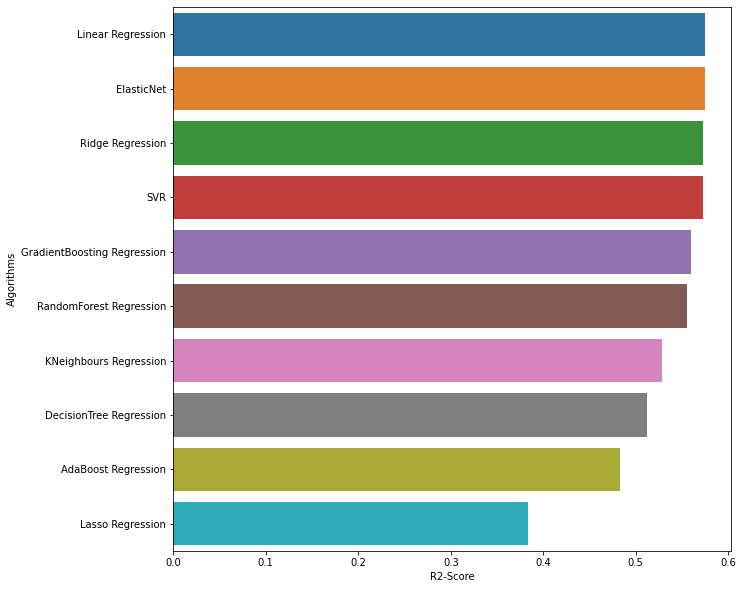

In [89]:
plt.figure(figsize=(10,10))
sns.barplot(x='R2-Score', y='Algorithms', data=ranking[['Algorithms', 'R2-Score']]);

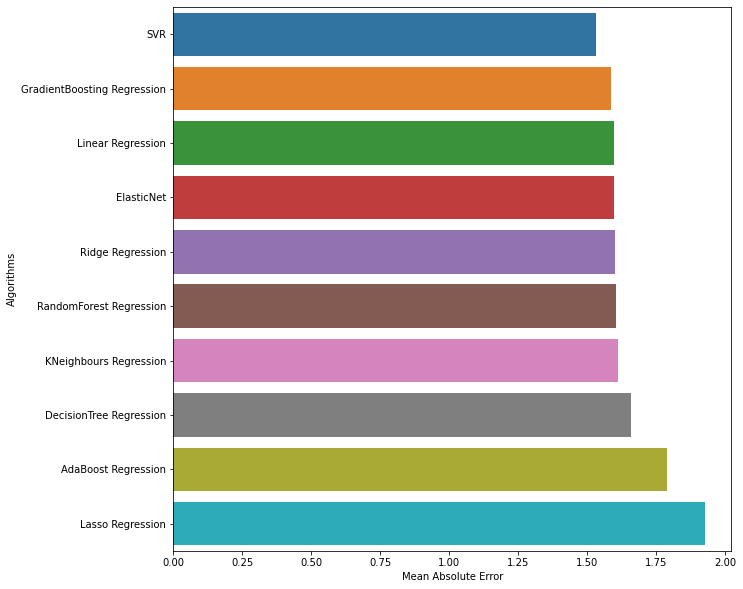

In [90]:
ranking = ranking.sort_values(by='Mean Absolute Error', ascending=True)
plt.figure(figsize=(10,10))
sns.barplot(x='Mean Absolute Error', y='Algorithms', data=ranking[['Algorithms', 'Mean Absolute Error']]);

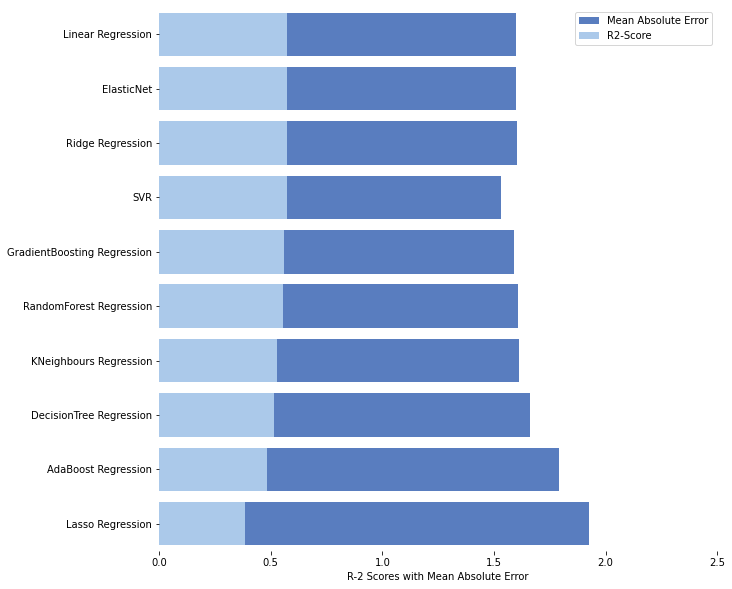

In [91]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))

ranking = ranking.sort_values(by='R2-Score', ascending=False)

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(x="Mean Absolute Error", y="Algorithms", data=ranking,
            label="Mean Absolute Error", color="b")

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="R2-Score", y="Algorithms", data=ranking,
            label="R2-Score", color="b")

# Add a legend and informative axis label
ax.legend(ncol=1, loc="upper right", frameon=True)
ax.set(xlim=(0, 2.5), ylabel="",
       xlabel="R-2 Scores with Mean Absolute Error")
sns.despine(left=True, bottom=True)

# Section2 - TensorFlow without normalization

In [92]:
len(X), len(X_train), len(X_test)

(4148, 3318, 830)

In [93]:
tf_scores = []
tf_mae_error = []

In [ ]:
# Build a neural network
tf.random.set_seed(42)

# 1. Create a model
abalone_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
abalone_model.compile(loss=tf.keras.losses.mae,
                      optimizer=tf.keras.optimizers.SGD(),
                      metrics=["mae"])

# 3. Fit the model
history = abalone_model.fit(X_train, y_train, epochs=100)

In [96]:
# Check the results of the abalone model on the test data - o ile średnio model różni sie od danych prawdziwych
abalone_model.evaluate(X_test, y_test)

26/26 [==============================] - 0s 2ms/step - loss: 1.5893 - mae: 1.5893


[1.589327096939087, 1.589327096939087]

In [97]:
y_pred = abalone_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
r2

26/26 [==============================] - 0s 2ms/step


0.5451617090024313

In [98]:
tf_mae_error.append(abalone_model.evaluate(X_test, y_test)[1])
tf_scores.append(r2)

26/26 [==============================] - 0s 2ms/step - loss: 1.5893 - mae: 1.5893


In [101]:
print(tf_mae_error)
print(tf_scores)

[1.589327096939087]
[0.5451617090024313]


To improve model:
1. Add an extra layer with more hidden units
2. Train for longer



In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
abalone_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
abalone_model_2.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=["mae"])

# 3. Fit the model
history_2 = abalone_model_2.fit(X_train, y_train, epochs=100)

In [103]:
# Evaluate the abalone_model_2
abalone_model_2.evaluate(X_test, y_test)

26/26 [==============================] - 0s 3ms/step - loss: 1.5891 - mae: 1.5891


[1.5891193151474, 1.5891193151474]

In [104]:
y_pred = abalone_model_2.predict(X_test)
r2 = r2_score(y_test, y_pred)
r2

26/26 [==============================] - 0s 1ms/step


0.5568029310223053

In [105]:
tf_mae_error.append(abalone_model_2.evaluate(X_test, y_test)[1])
tf_scores.append(r2)

26/26 [==============================] - 0s 2ms/step - loss: 1.5891 - mae: 1.5891


In [ ]:
# Optimizer Adam()

# Set random seed
tf.random.set_seed(42)

# 1. Create the model
abalone_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
abalone_model_3.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=["mae"])

# 3. Fit the model
history_3 = abalone_model_3.fit(X_train, y_train, epochs=100)

In [107]:
# Evaluate the abalone_model_3
abalone_model_3.evaluate(X_test, y_test)

26/26 [==============================] - 0s 2ms/step - loss: 1.6027 - mae: 1.6027


[1.6026939153671265, 1.6026939153671265]

In [108]:
y_pred = abalone_model_3.predict(X_test)
r2 = r2_score(y_test, y_pred)
r2

26/26 [==============================] - 0s 1ms/step


0.5452076565098913

In [109]:
tf_mae_error.append(abalone_model_3.evaluate(X_test, y_test)[1])
tf_scores.append(r2)

26/26 [==============================] - 0s 2ms/step - loss: 1.6027 - mae: 1.6027


In [ ]:
# Try SGD() optimizer for longer

# Set random seed
tf.random.set_seed(42)

# 1. Create the model
abalone_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
abalone_model_4.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=["mae"])

# 3. Fit the model
abalone_model_4.fit(X_train, y_train, epochs=200)

In [111]:
# Evaluate the abalone_model_4
abalone_model_4.evaluate(X_test, y_test)

26/26 [==============================] - 0s 3ms/step - loss: 1.6009 - mae: 1.6009


[1.6009104251861572, 1.6009104251861572]

In [112]:
y_pred = abalone_model_4.predict(X_test)
r2 = r2_score(y_test, y_pred)
r2

26/26 [==============================] - 0s 1ms/step


0.5272474339178025

In [113]:
tf_mae_error.append(abalone_model_4.evaluate(X_test, y_test)[1])
tf_scores.append(r2)

26/26 [==============================] - 0s 7ms/step - loss: 1.6009 - mae: 1.6009


In [ ]:
# Try SGD() optimizer for longer

# Set random seed
tf.random.set_seed(42)

# 1. Create the model
abalone_model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
abalone_model_5.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=["mae"])

# 3. Fit the model
abalone_model_5.fit(X_train, y_train, epochs=500)

In [115]:
# Evaluate the abalone_model_5
abalone_model_5.evaluate(X_test, y_test)

26/26 [==============================] - 0s 2ms/step - loss: 1.5995 - mae: 1.5995


[1.5994621515274048, 1.5994621515274048]

In [116]:
y_pred = abalone_model_5.predict(X_test)
r2 = r2_score(y_test, y_pred)
r2

26/26 [==============================] - 0s 1ms/step


0.5303163804429782

In [117]:
tf_mae_error.append(abalone_model_5.evaluate(X_test, y_test)[1])
tf_scores.append(r2)

26/26 [==============================] - 0s 3ms/step - loss: 1.5995 - mae: 1.5995


In [ ]:
# Try Adam() optimizer for longer

# Set random seed
tf.random.set_seed(42)

# 1. Create the model
abalone_model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Comile the model
abalone_model_6.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=["mae"])

# 3. Fit the model
abalone_model_6.fit(X_train, y_train, epochs=500)

In [119]:
# Evaluate the abalone_model_6
abalone_model_6.evaluate(X_test, y_test)

26/26 [==============================] - 0s 2ms/step - loss: 1.5883 - mae: 1.5883


[1.5883466005325317, 1.5883466005325317]

In [120]:
y_pred = abalone_model_6.predict(X_test)
r2 = r2_score(y_test, y_pred)
r2

26/26 [==============================] - 0s 1ms/step


0.5391829548289448

In [121]:
tf_mae_error.append(abalone_model_6.evaluate(X_test, y_test)[1])
tf_scores.append(r2)

26/26 [==============================] - 0s 4ms/step - loss: 1.5883 - mae: 1.5883


In [122]:
optimizers = ['SGD_l2_e100','SGD_l3_e100','Adam_l3_e100','SGD_l3_e200','SGD_l3_e500','Adam_l3_e500']

In [123]:
# Ranking
ranking = pd.DataFrame({'Algorithms' : models, 'R2-Score' : scores, 'Mean Absolute Error' : mae_error})
ranking = ranking.sort_values(by='R2-Score', ascending=False)
ranking

,Algorithms,R2-Score,Mean Absolute Error
0,Linear Regression,0.574380,1.598133
8,ElasticNet,0.574366,1.598148
3,Ridge Regression,0.572641,1.600865
7,SVR,0.572407,1.532379
6,GradientBoosting Regression,0.559956,1.587951
4,RandomForest Regression,0.555643,1.606412
5,KNeighbours Regression,0.528028,1.613696
9,DecisionTree Regression,0.512600,1.660411
2,AdaBoost Regression,0.482817,1.789914
1,Lasso Regression,0.383075,1.926425


In [124]:
# Tf Ranking
tf_ranking = pd.DataFrame({'Optimizers_layers_epochs' : optimizers, 'R2-Score' : tf_scores, 'Mean Absolute Error' : tf_mae_error})
tf_ranking = tf_ranking.sort_values(by='R2-Score', ascending=False)
tf_ranking

,Optimizers_layers_epochs,R2-Score,Mean Absolute Error
1,SGD_l3_e100,0.556803,1.589119
2,Adam_l3_e100,0.545208,1.602694
0,SGD_l2_e100,0.545162,1.589327
5,Adam_l3_e500,0.539183,1.588347
4,SGD_l3_e500,0.530316,1.599462
3,SGD_l3_e200,0.527247,1.600910


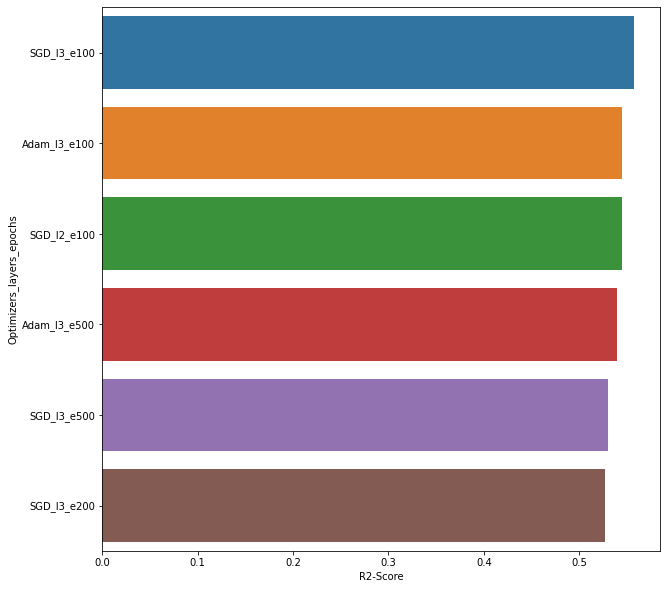

In [125]:
plt.figure(figsize=(10,10))
sns.barplot(x='R2-Score', y='Optimizers_layers_epochs', data=tf_ranking[['Optimizers_layers_epochs', 'R2-Score']]);

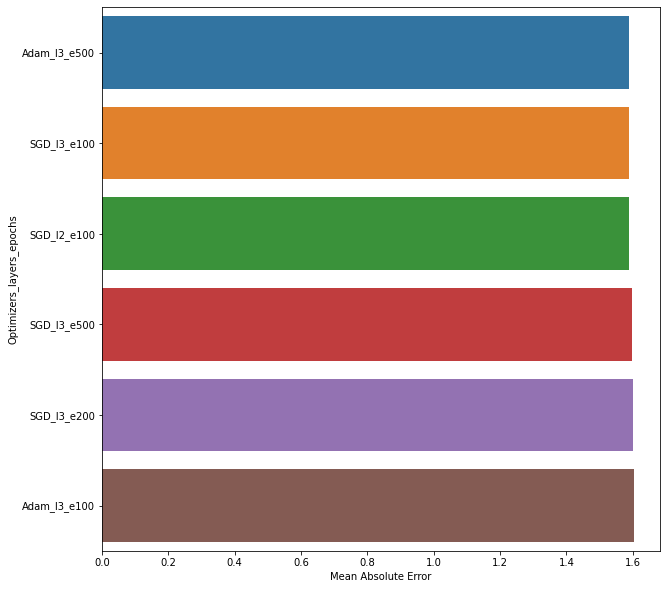

In [130]:
tf_ranking = tf_ranking.sort_values(by='Mean Absolute Error', ascending=True)
plt.figure(figsize=(10,10))
sns.barplot(x='Mean Absolute Error', y='Optimizers_layers_epochs', data=tf_ranking[['Optimizers_layers_epochs', 'Mean Absolute Error']]);

<Figure size 2160x1440 with 0 Axes>

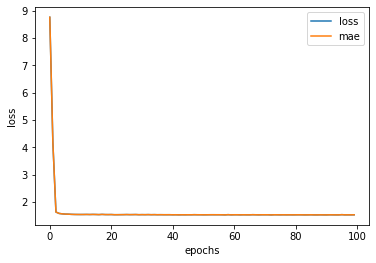

In [131]:
# Plot history (also known as a loss curve or a training curve) - SGD_l2_e100
plt.figure(figsize=(30,20));
pd.DataFrame(history.history).plot();
plt.ylabel("loss");
plt.xlabel("epochs");

<Figure size 2160x1440 with 0 Axes>

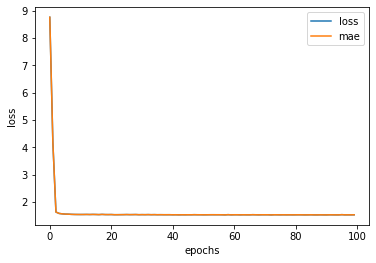

In [132]:
# Plot history (also known as a loss curve or a training curve) - SGD_l3_e100
plt.figure(figsize=(30,20));
pd.DataFrame(history.history).plot();
plt.ylabel("loss");
plt.xlabel("epochs");

<Figure size 2160x1440 with 0 Axes>

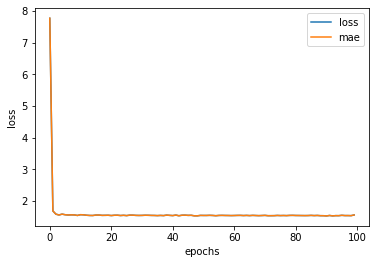

In [133]:
# Plot history_3 (also known as a loss curve or a training curve) - Adam_l3_e100
plt.figure(figsize=(30,20));
pd.DataFrame(history_3.history).plot();
plt.ylabel("loss");
plt.xlabel("epochs");